In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

import ncc_tracker_example
import sequence_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Assignment 1: Mean-shift mode seeking

In [5]:
from ex2_utils import Tracker, get_patch, create_epanechnik_kernel,extract_histogram, backproject_histogram, generate_responses_1

In [699]:
# part 1
ERR_EPSILON = 0.1
# part 2
N_BINS = 16
EPANECHNIK_SIGMA = 0.2

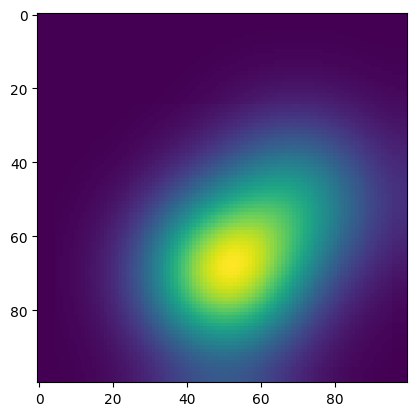

In [376]:
plt.imshow(generate_responses_1())

In [703]:

def mean_shift(img:np.ndarray, kernel:np.ndarray, start_pos:np.ndarray):
  x_p = [start_pos[0]]
  y_p = [start_pos[1]]
  figure, (ax0) = plt.subplots(1, 1)
  plt.scatter(start_pos[0], start_pos[1], color="black")

  shift = np.ones((2)) * np.inf
  h, w = kernel.shape
  pos = start_pos.copy()
  # for grid iterations
  xi, yi = np.meshgrid(
    np.arange(- (w//2), w//2 + 1),
    np.arange(- (h//2), h//2 + 1)
    )
  
  i = 0
  while np.max(np.abs(shift)) > ERR_EPSILON:
    # get image patch
    rounded_pos = np.round(pos).astype(int)
    patch =  img[
      rounded_pos[0] - h // 2 : rounded_pos[0] + h // 2 + 1,
      rounded_pos[1] - w // 2 : rounded_pos[1] + w // 2 + 1
      ]
    shift_x = np.sum(xi * patch * kernel) / np.sum(patch * kernel)
    shift_y = np.sum(yi * patch * kernel ) / np.sum(patch * kernel)
    shift = np.array([shift_y, shift_x])
    pos = pos + np.array([shift_y, shift_x])

    ty, tx = np.round(pos).astype(np.int32)
    x_p.append(tx)
    y_p.append(ty)
    i += 1

    if(i > 100000):
      break

  print(f"Error {np.max(np.abs(shift))} after {i} iterations")
  ax0.imshow(img)
  ax0.plot(x_p, y_p)
  ax0.scatter(x_p, y_p)
  plt.show()
  return pos


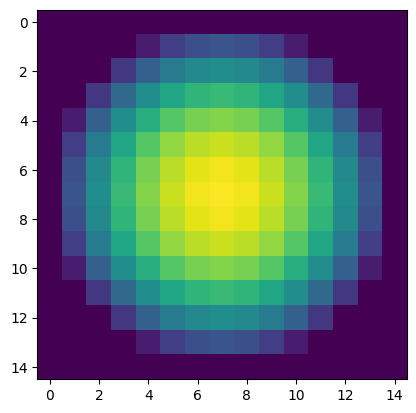

In [544]:
kernel = create_epanechnik_kernel(15,15,1)
# kernel = np.ones(shape=(15,15))
plt.imshow(kernel)

5
Error 0.02338176339317357 after 1 iterations


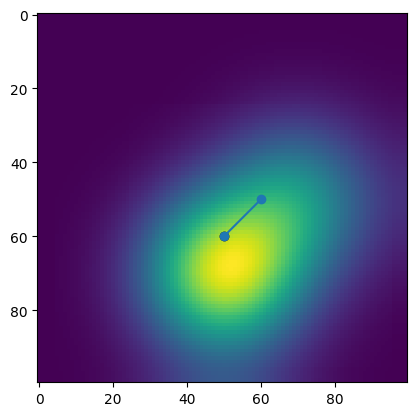

[50. 60.]

11
Error 0.09937471108108913 after 52 iterations


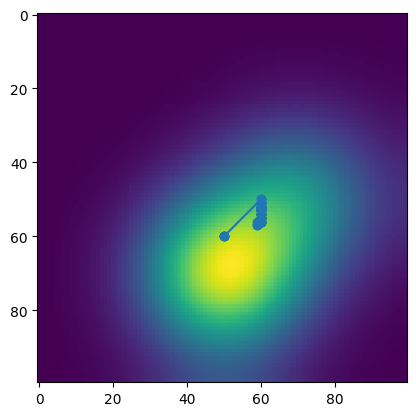

[57. 59.]

15
Error 0.08545348691901931 after 67 iterations


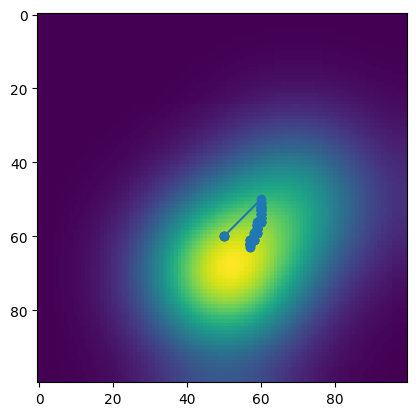

[63. 57.]

21
Error 0.06503125549586682 after 56 iterations


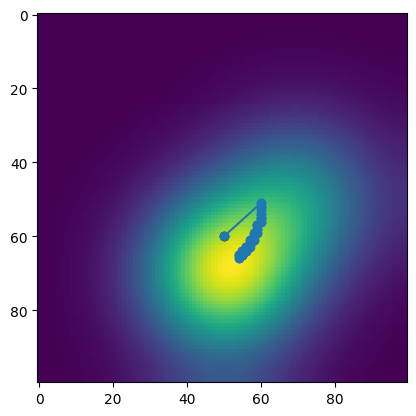

[66. 54.]

33
Error 0.01661035320626956 after 32 iterations


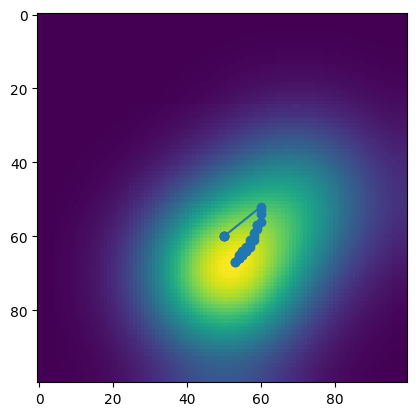

[67. 53.]



In [706]:

grid = generate_responses_1()
starting_pos = np.array([50,60])

for i in [5, 11, 15, 21,33,]:
  print(i)
  out = mean_shift(grid, create_epanechnik_kernel(i,i,1), starting_pos,)
  print(np.round(out))
  print()

# display(out)
# display(np.mean(np.square(out - np.array([70, 50]))))


Error 0.1114003159833666 after 100001 iterations


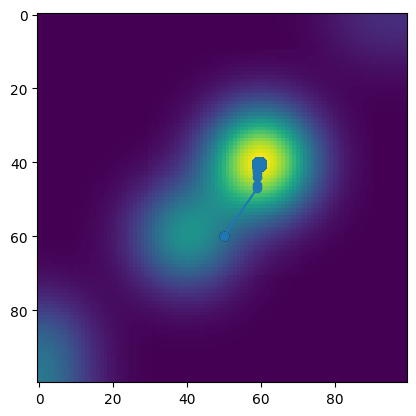

[40. 59.]



In [707]:
# custom
from ex2_utils import generate_responses_custom

grid = generate_responses_custom()
starting_pos = np.array([50,60])
out = mean_shift(grid, create_epanechnik_kernel(33,33,1), starting_pos,)
print(np.round(out))
print()


Error 0.19906027474441182 after 100001 iterations


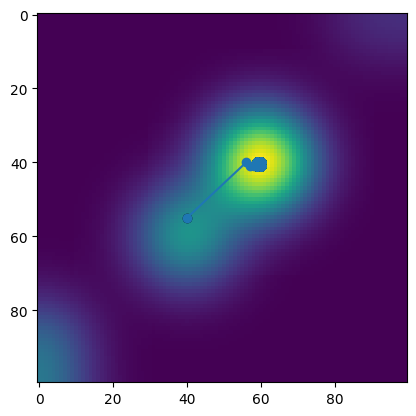

[40. 59.]



In [708]:
grid = generate_responses_custom()
starting_pos = np.array([40,55])
out = mean_shift(grid, create_epanechnik_kernel(33,33,1), starting_pos,)
print(np.round(out))
print()

# Assignment 2: Mean-shift tracker

For the second assignment you will implement a tracker that uses the Mean-shift method
from Assignment 1.  
The basic idea of using optimization in tracking scenario is to initialize the method at the last known position of the target and let it converge to (hopefully) correct new position.  


Implement a mean-shift tracker (described in paper [1] and on lecture slides) that uses color histogram and histogram backprojection to construct a foreground similarity distribution.  
Additionally you can also test some improvements, like modeling background color
distribution as it is described in [1] (section 6.1). Write the tracker in the separate class,
which inherits the Tracker class from ex2_utils.py, similarly as in the NCC example.

In [721]:
!python3 run_tracker.py

Tracking speed: 961.6 FPS
Tracker failed 0 times
